# Series de Tiempo -- R -- Pronóstico con regresión
Notas de clase sobre pronóstico de series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre la extracción, transformación, visualización y carga de datos usando **R** en el contexto de la ciencia de los datos. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

#### Contenido

> 
* [Introducción](#Introducción)
* [Modelo de regresión lineal simple](#Modelo-de-regresión-lineal-simple)
    * [Modelado de tendencia lineal en una serie de tiempo](#Modelado-de-tendencia-lineal-en-una-serie-de-tiempo)     
    * [Análisis de residuales del modelo lineal](#Análisis-de-residuales-del-modelo-lineal)
* [Modelo de regresión lineal multiple](#Modelo-de-regresión-lineal-multiple)
    * [Modelado de tendencia cuadrática en una serie de tiempo](#Modelado-de-tendencia-cuadrática-en-una-serie-de-tiempo)
    * [Análisis de residuales del modelo cuadrático](#Análisis-de-residuales-del-modelo-cuadrático)
* [Modelo de regresión multiple para componente de tendencia y estacionalidad.](#Modelo-de-regresión-multiple-para-componente-de-tendencia-y-estacionalidad.)
    * [Ajuste del modelo de regresión multiple](#Ajuste-del-modelo-de-regresión-multiple)
    * [Pronóstico del modelo de regresión multiple](#Pronóstico-del-modelo-de-regresión-multiple)
* [Intervenciones](#Intervenciones)
    * [Serie de tiempo con cambio estructural](#Serie-de-tiempo-con-cambio-estructural)
        * [Modelo de ajuste cambio estructural](#Modelo-de-ajuste-cambio-estructural)
    * [Serie de tiempo con cambio de pendiente](#Serie-de-tiempo-con-cambio-de-pendiente)
        * [Modelo de ajuste cambio de pendiente](#Modelo-de-ajuste-cambio-de-pendiente)
    * [Serie de tiempo con datos atipicos-outliers](#Serie-de-tiempo-con-datos-atipicos-outliers)
        * [Modelo de ajuste outliers](#Modelo-de-ajuste-outliers)
     

**Bibliografía**.

> [Bibliografia aquí](Vinculo aquí)

---

# Introducción

[Contenido](#Contenido)

El pronóstico se basa principalmente en los datos historicos de la serie, teniendo como suposición principal que este comportamiento pasado se puede repetir en el futuro.Existen cuatro patrones o componentes básicos en el estudio de las series de tiempo.

**1. Componente de tendencia ${(T_t)}$**: La tendencia es una evolución lenta y a largo plazo de la serie, caracterizado por un crecimiento o decrecimiento de los valores de esta.


**2. Componente estacional ${(S_t)}$ **: La estacionalidad de una serie de tiempo es un patrón que se repite en periodos conocidos, normalmente en una base anual. Este comportamiento se debe principalmente a factores como el clima, días de vacaciones, consumos, estaciones,etc.

**3. Componente cíclico ${(C_t)}$** La componente cíclica se refleja en cambios o movimientos de los datos y generalmente estas fluctuaciones duran 2 años o mas. Este comportamiento se asocia normalmente a fluctuaciones economicas de largo plazo.

La diferencia de la componente estacional y cíclica en series de tiempo que la estacionalidad tiene una longitud constante y se repite sobre una base periodíca, mientras que los ciclos cambian en tanto el longitud como en magnitud.

**4. Componente aleatorio (Error) ${(E_t)}$**: El componente de error de una serie de tiempo está asociado con variaciones aleatorias sin ningún patrón o comportamiento definido alrededor de una media. Normalmente esta componente se debe a eventos extremos *(outliers)* en la serie de tiempo.

In [1]:
## Instale y cargue las siguientes librerías
library(Cairo)
library(forecast)
library(TSA)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: 'timeDate'

The following object is masked from 'package:Cairo':

    Cairo

This is forecast 7.1 

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:forecast':

    getResponse

This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.
Loading required package: tseries

Attaching package: 'TSA'

The following objects are masked from 'package:forecast':

    fitted.Arima, plot.Arima

The following objects are masked from 'package:timeDate':

    kurtosis, skewness

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



# Modelo de regresión lineal simple

[Contenido](#Contenido)

<p>El modelo matemático de una regresión lineal simple es expresado como:</p> 
<center>
$$ Y = {\beta_0 + \beta_1 {X}_1 + \epsilon} $$
</div></center>


<p>Donde:</p>

* <p>${Y}$: Variable dependendiente o variable respuesta</p>

* <p>${X}_1$: Variable independiente o explicatoria</p>

* <p>$ \beta_0$: Intercepto de la recta de regresión  </p>

* <p>$\beta_1$: Parametro o coeficiente de regresión</p>

* <p>$\epsilon$: Error aleatorio</p>

Los supuestos del modelo:

<p>${B}_1$ ~ $N(\mu_1,{\sigma_1}^2)$ </p>

<p>${B}_0$ ~ $N(\mu_0,{\sigma_0}^2)$ </p>


Y en cuanto al error :

1. <p>${E(\epsilon)}$: 0</p>

2. <p>${Var(\epsilon)}$: ${σ^2}$ </p>

3.  <p> Se supone que su distribución es normal, $\epsilon$ ~ ${N(0,σ^2)}$</p>

## Modelado de tendencia lineal en una serie de tiempo

[Contenido](#Contenido)

El modelo de regresión lineal simple para estimar la tendencia lineal es:

$$ T_t = \beta_0 + \beta_1 {t} + \epsilon_t $$

> [`lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html)

In [2]:
## Regresión en R

## Datos
y <- c( 51.74, 48.92, 52.12, 51.90,
        50.88, 52.52, 52.50, 55.05,
        56.73, 55.05, 56.85, 55.29,
        55.70, 56.72, 56.56, 57.85,
        58.67, 59.59, 57.61, 60.15,
        60.97, 61.47, 61.94, 63.00,
        60.80, 62.67, 66.14, 64.40,
        64.04, 64.15, 65.41, 65.47,
        66.25, 67.86, 65.97, 67.52,
        69.25, 67.81, 69.53, 71.16,
        71.13, 70.24, 71.51, 71.32,
        71.34, 72.52, 73.14, 73.33,
        75.21, 74.07 )

## Objeto time-series
y <- ts(y,frequency = 4,start = c(2005,1))    # Variable Dependiente Y: Datos 

## Variable x
t<- seq(1:length(y))                          # Variable independiente t: Tiempo

## Ajuste
m1 <- lm(y~t)
m1


Call:
lm(formula = y ~ t)

Coefficients:
(Intercept)            t  
    50.0321       0.4944  


In [3]:
## Resumen de regresión
summary(m1)


Call:
lm(formula = y ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1010 -0.6462 -0.1043  0.5935  2.7579 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.032122   0.286653  174.54   <2e-16 ***
t            0.494442   0.009783   50.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9983 on 48 degrees of freedom
Multiple R-squared:  0.9816,	Adjusted R-squared:  0.9812 
F-statistic:  2554 on 1 and 48 DF,  p-value: < 2.2e-16


### Interpretación de los resultados:

<p>  **Estimate**: Es el valor estimado de los coeficientes de regresión. $\beta_0$ y $\beta_1$

<p>  **Std. Error**: Corresponde a  la desviación estándar de la distribución muestral de la estimación de los coeficientes bajo los supuestos de regresión.</p>

<p>** t-value**: Es el valor del estadístico t y se utiliza para comprobar que los coeficientes de la regresión sopn estadisticamente diferentes de 0.</p>

<p>**Pr**: Es el valor $p$ de la prueba de hipotesis para el cual el valor t es el estadistico de prueba. Se interpreta como la probabilidad  de equivocarse dado que rechace la hipótesis nula de la prueba. La hipotesis nula $H_0$ es que el coeficiente real es cero, la hipéstis alternativa $H_a$ es que el coeficiente es distinto de cero. Luego, para este caso, la probabilidad de equivocarse dade que rechace la $H_0$ es de menos de $2{\exp}^-16$, es decir, aproximadamente cero, por tanto rechazo la $H_0$ y concluyo que los coeficientes son estadisticamente diferentes de cero.




### Medidas de la regresión

<p> **Residual standard error**: Representa la desviación estándar de los residuales. Es una medida que calcula  qué tan cerca está el ajuste de los datos reales. </p>

<p> **Multiple R-squared**: Es también llamado coeficiente de determinación y es que tanto el modelo ajustado explica la variabilidad de los datos. El ajustado tiene en cuenta el número de parametros que se estimaron del modelo.</p>

<p> ** $F$  statistic**: La prueba estadística F dice si el modelo de regresión tiene un desempeño mejor que un conjunto de datos al azar. Esto se utiliza para una prueba de si el modelo supera 'ruido aleatorio' como un predictor. El valor de p en la última fila es el valor de p para la prueba.</p>

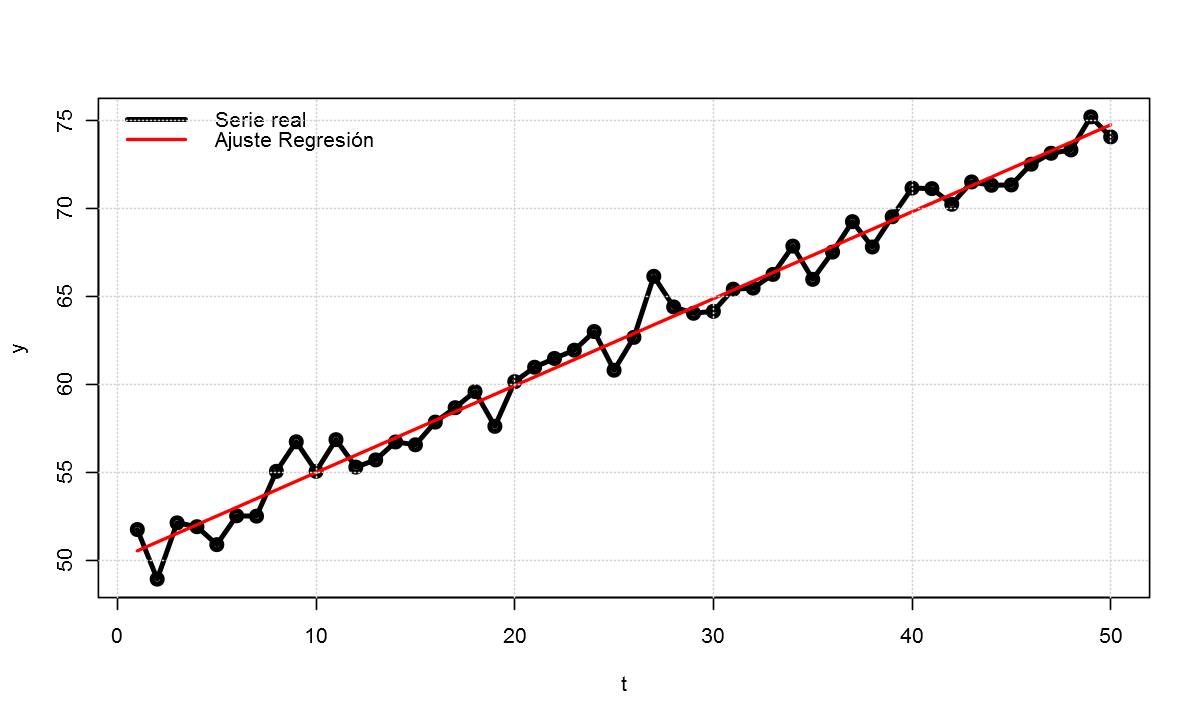

In [4]:
## Gráfica de ajuste.
options(repr.plot.width=10, repr.plot.height=6)

plot(t,y,                                             # datos de la serie
     type = "o",                                      # o -- overplot
     lwd = 3)                                         # ancho de la linea


lines(m1$fitted.values, col = "red", lwd = 2)


legend( "topleft",                                     # posicion
        c("Serie real","Ajuste Regresión"),            # texto
        lwd = c(3, 2),                                 # grosor lineas
        col = c('black','red'),                        # color lineas
        bty = "n")                                     # sin caja alrededor de la leyenda

grid()

## Análisis de residuales del modelo lineal


[Contenido](#Contenido)


Puede realizar el análisis del comportamiento de los residuales con el fin de verificiar que se cumplan los supuestos y así la validez del modelo.

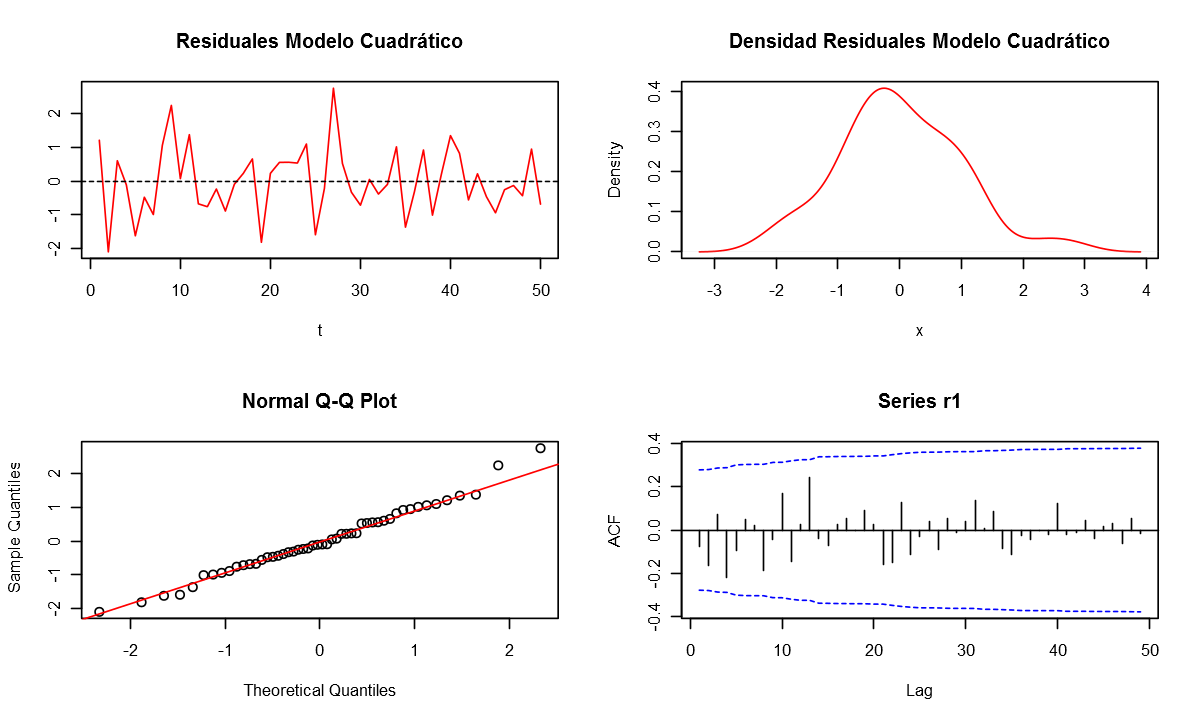

In [5]:
## Extraer residuales modelo lineal
r1 = m1$residuals

## Residuales Modelo lineal
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=6)

plot(t,r1,
     type='l',
     ylab='',main="Residuales Modelo Cuadrático",
     col="red")

abline(h=0,lty=2)       # Linea para la media

plot(density(r1),       # Gráfica de densidad
     xlab='x',
     main= 'Densidad Residuales Modelo Cuadrático', 
     col="red")

qqnorm(r1)               # Gráfica qqnorm para probar normalidad
qqline(r1,col=2)         # Linea

acf(r1, ci.type="ma",60) # Prueba ACF

# Modelo de regresión lineal multiple

[Contenido](#Contenido)

<p>Este modelo es una extensión del modelo lineal simple, por lo cual se sigue teniendo los supuestos inicialmente planteados. El modelo matemático de la regresión lineal multiple puede ser expresado como:</p> 
<center>
$$ Y = {{B}_0 + {B}_1 {X}_1 + {B}_2 {X}_2 +..+ {B}_k {X}_k + {E}} $$
</div></center>



## Modelado de tendencia cuadrática en una serie de tiempo

[Contenido](#Contenido)

El modelo de regresión multiple para estimar la tendencia cuadrática de una serie es:

$$ T_t = \beta_0 + \beta_1 {t} + \beta_2 {t}^2 + \epsilon_t $$

In [6]:
## Datos de la serie
y<- c(  23.47,  25.32,  19.66,  26.91,
        19.08,  22.88,  35.49,  23.33,
        25.26,  27.22,  32.99,  36.45,
        35.20,  39.99,  45.94,  47.29,
        47.34,  46.39,  50.79,  53.07,
        55.61,  59.22,  65.38,  63.58,
        69.53,  78.23,  78.52,  82.44,
        90.66,  82.86,  93.54,  94.05,
        101.24,  97.06, 119.74, 119.75,
        118.28, 116.69, 126.91, 132.68,
        137.10, 151.43, 151.47, 146.06,
        154.55, 156.77, 164.12, 176.14,
        171.41, 192.87)  

## Objeto time-series
y <- ts(y,frequency = 4,start = c(2005,1))       # Variable Dependiente Y: Datos 

## Variable x
t<- seq(1:length(y))                             # Variable independiente t: Tiempo
tt<- t*t                                         # Parametro t^2

## Ajuste
m1 <- lm(y~t+tt)

In [7]:
m1


Call:
lm(formula = y ~ t + tt)

Coefficients:
(Intercept)            t           tt  
   18.84084      0.79412      0.05073  


In [8]:
## Resumen de regresión
summary(m1)


Call:
lm(formula = y ~ t + tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1358 -3.0718  0.0167  2.6452 10.9656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.84084    2.02956   9.283 3.34e-12 ***
t            0.79412    0.18359   4.326 7.87e-05 ***
tt           0.05073    0.00349  14.535  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.594 on 47 degrees of freedom
Multiple R-squared:  0.992,	Adjusted R-squared:  0.9917 
F-statistic:  2926 on 2 and 47 DF,  p-value: < 2.2e-16


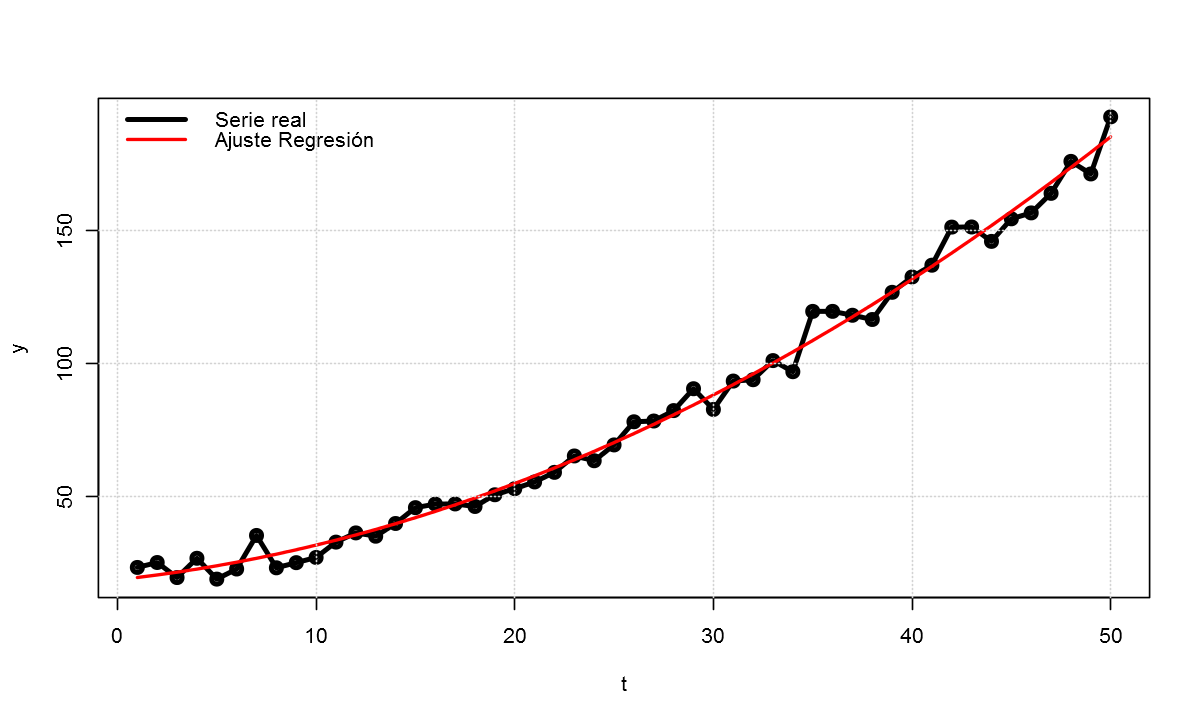

In [9]:
## Gráfica de ajuste.
options(repr.plot.width=10, repr.plot.height=6)

plot(t,y,                                             # datos de la serie
     type = "o",                                      # o -- overplot
     lwd = 3)                                         # ancho de la linea


lines(m1$fitted.values, col = "red", lwd = 2)

legend( "topleft",                                     # posicion
        c("Serie real","Ajuste Regresión"),            # texto
        lwd = c(3, 2),                                 # grosor lineas
        col = c('black','red'),                        # color lineas
        bty = "n")                                     # sin caja alrededor de la leyenda

grid()

## Análisis de residuales del modelo cuadrático

[Contenido](#Contenido)

Puede realizar el análisis del comportamiento de los residuales con el fin de verificiar que se cumplan los supuestos y así la validez del modelo.

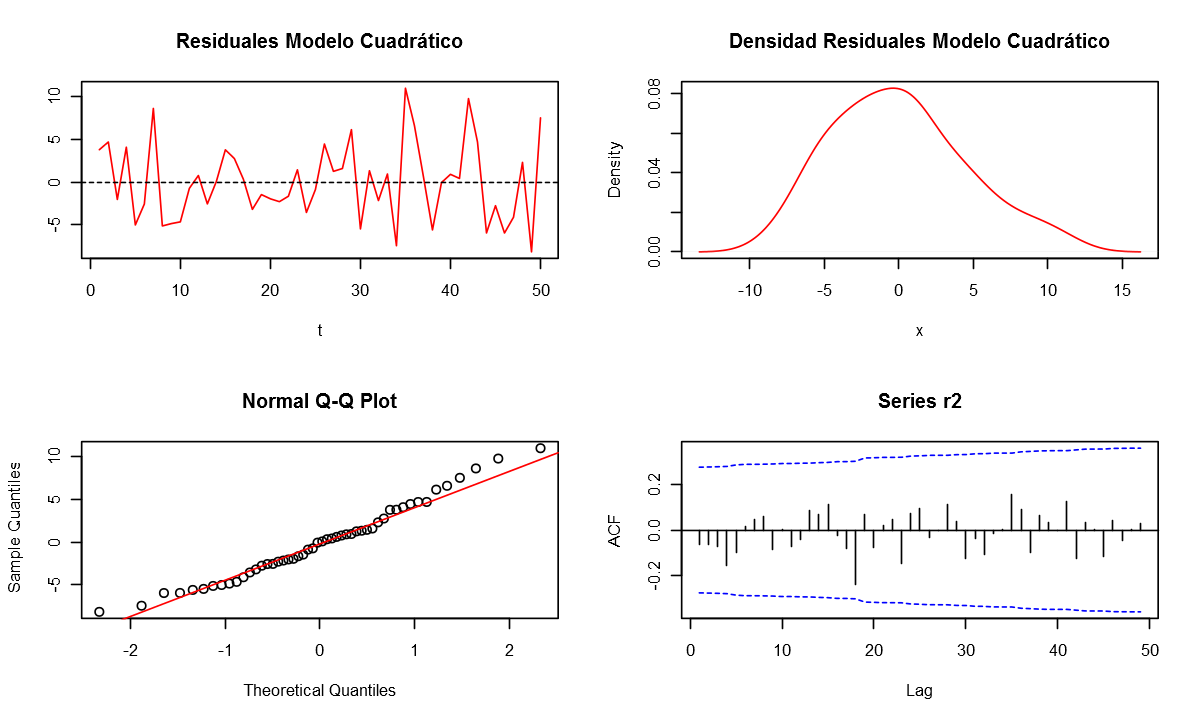

In [10]:
## Extraer residuales modelo cuadrático
r2 = m1$residuals

# Residuales Modelo Cuadrático
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=6)

plot(t,r2,
     type='l',
     ylab='',main="Residuales Modelo Cuadrático",
     col="red")

abline(h=0,lty=2)        # Linea para la media

plot(density(r2),        # Gráfica de densidad
     xlab='x',
     main= 'Densidad Residuales Modelo Cuadrático', 
     col="red")

qqnorm(r2)               # Gráfica qqnorm para probar normalidad
qqline(r2,col=2)         # Linea

acf(r2, ci.type="ma",60) # Prueba ACF

---

**Ejercicio.--**. Realice un modelo lineal , un modelo cuadrático y un modelo cúbico para ajustar la tendencia de la siguiente serie. Presente el resumen de la regresión de cada modelo ajustado.

**Ejercicio.--** Realice la gráfica del ajuste de cada modelo y elija el que mejor desempeño presente.


**Ejercicio.--** Realice el análisis de los residuales de cada modelo que planteo, se cumplen los supuestos en cada modelo?

---

# Modelo de regresión multiple para componente de tendencia y estacionalidad.

[Contenido](#Contenido)

## Ajuste del modelo de regresión multiple

[Contenido](#Contenido)

In [11]:
## Datos ts
x <-ts(data = c(  12.82, 13.03, 11.58, 11.77, 
                  12.84, 13.07, 12.36, 12.14,
                  12.96, 13.63, 12.83, 12.16,
                  13.98, 13.88, 13.14, 13.27,
                  13.90, 14.24, 13.46, 13.25,
                  14.54, 14.45, 14.08, 13.83),
       freq = 4,
       start = c(2010,01))

T=length(x)           # Variable independiente t: Tiempo
t=seq(1:(T-4))

x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))

x.fit
x.for


      Qtr1  Qtr2  Qtr3  Qtr4
2010 12.82 13.03 11.58 11.77
2011 12.84 13.07 12.36 12.14
2012 12.96 13.63 12.83 12.16
2013 13.98 13.88 13.14 13.27
2014 13.90 14.24 13.46 13.25

      Qtr1  Qtr2  Qtr3  Qtr4
2015 14.54 14.45 14.08 13.83

Para modelar la componente estacional $S_t$ debe:

<p>1. Identificar el periodo de la serie de tiempo $Y_t$, en R al utilizar el objeto tipo `ts`, si se da un valor al parametro `freq` será el posible periodo $S$.</p>

<p>2.  Generar las variables indicadoras $I_{j} (t)$, para $t=1,..S$, que indica al modelo de ajuste en que periodo de tiempo se encuentra mediante {0,1}. R lo calcula automaticamente con la función `seasonaldummy`.</p> 

<p>3. Estimar los parametros del modelo. En R con la función `lm` como se ha realizado anteriormente.</p> 



Por tanto el modelo de regresión completo queda como:

$$Y_t = T_t + S_t = \beta_0 + \sum_{j=1}^{k} \beta_j {t^j} + \sum_{j=1}^{s-1} \delta_j I_j {t} + \epsilon_T $$


> [`seasonaldummy {forecast}`](https://cran.r-project.org/web/packages/forecast/forecast.pdf)

In [12]:
## Periodo de la serie
##
## Freq= 4

## Generación de variables indicadores
It=seasonaldummy(x.fit)

## Estimación del modelo
m1 = lm(x.fit ~ t + It)                                #t:Tendencia (Tt) It:Varaibles ind. (St)

m.fit = ts(m1$fitted.values, freq=4, start=c(2010,1))  # Valores ajustados del modelo

In [13]:
summary(m1)


Call:
lm(formula = x.fit ~ t + It)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35800 -0.09625  0.00550  0.10425  0.37300 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.381000   0.151601  75.072  < 2e-16 ***
t            0.094750   0.009192  10.308 3.35e-08 ***
ItQ1         1.066250   0.149638   7.126 3.47e-06 ***
ItQ2         1.241500   0.148219   8.376 4.87e-07 ***
ItQ3         0.250750   0.147362   1.702    0.109    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2325 on 15 degrees of freedom
Multiple R-squared:  0.9214,	Adjusted R-squared:  0.9004 
F-statistic: 43.96 on 4 and 15 DF,  p-value: 4.112e-08


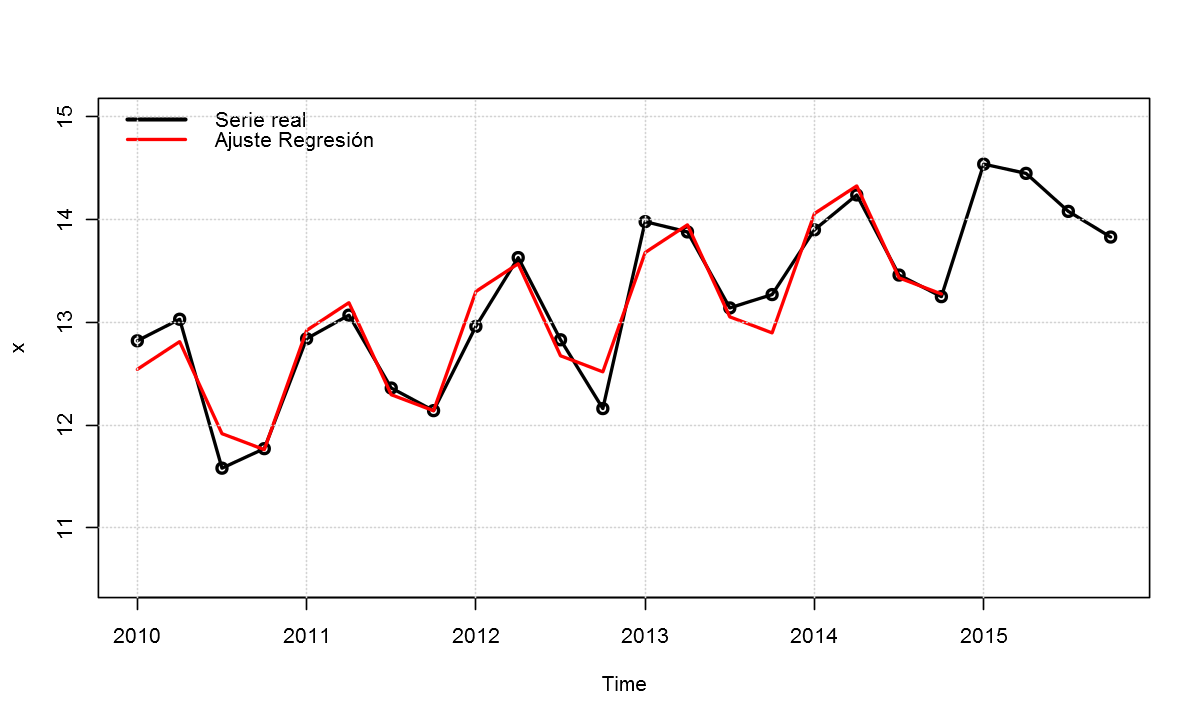

In [14]:
## Gráfica del ajuste del modelo

options(repr.plot.width=10, repr.plot.height=6)
plot( x,
      type = 'o',
      lwd=2,
      ylim=c(10.5,15))

lines(m.fit,col='red',lwd=2)


legend( "topleft",                                     # posicion
        c("Serie real","Ajuste Regresión"),            # texto
        lwd = c(2.5, 2),                               # grosor lineas   
        col = c('black','red'),                        # color lineas
        bty = "n")                                     # sin caja alrededor de la leyenda

grid()

## Pronóstico del modelo de regresión multiple

[Contenido](#Contenido)

> [`predict.lm {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.lm.html)

> [`seasonaldummyf {forecast}`](https://cran.r-project.org/web/packages/forecast/forecast.pdf)

In [15]:
## Longitud del periodo de ajuste
T = length(x.fit)

## Periodos a pronosticar
m=4

## Variables indicadoras del pronostico
Itf = seasonaldummyf(x.fit,m)

## Tiempo 
tf = seq(T+1,T+m,1)

## Predicción
y1 = predict(m1,data.frame(t = tf,It=I(Itf)))
y1<-ts(y1,freq=4,start=c(2015,1))

Warning message:
In seasonaldummyf(x.fit, m): seasonaldummyf() is deprecated, please use seasonaldummy()

In [16]:
y1

       Qtr1   Qtr2   Qtr3   Qtr4
2015 14.437 14.707 13.811 13.655

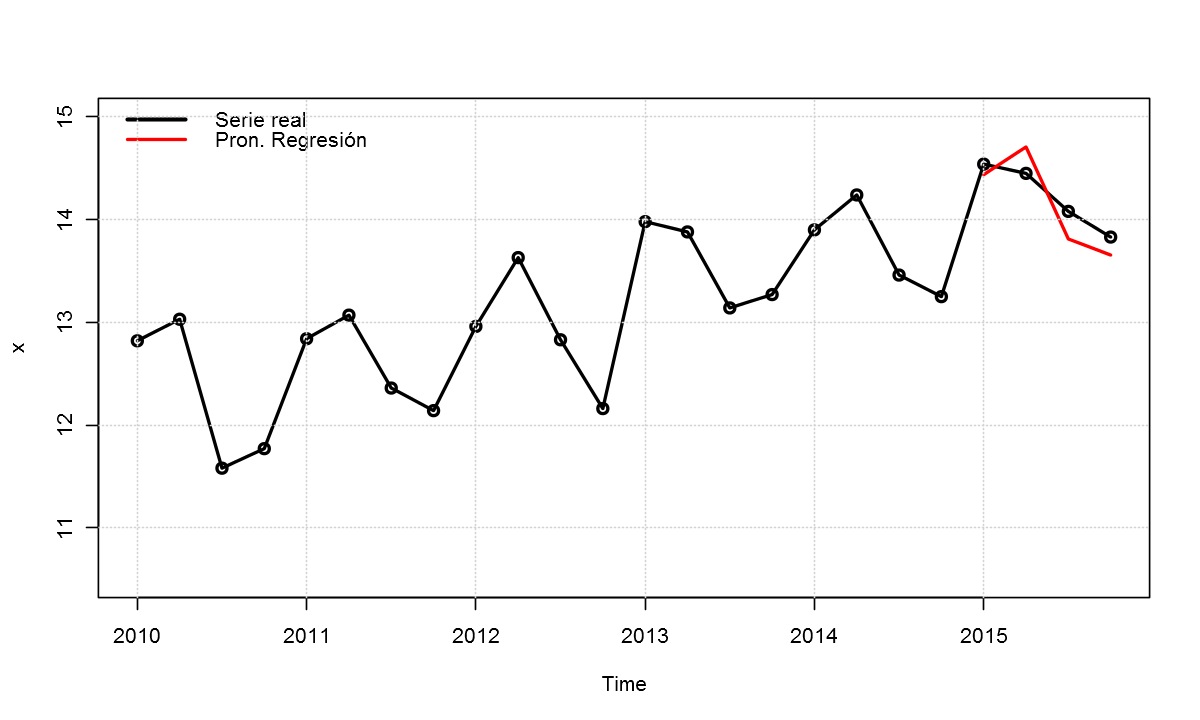

In [17]:
## Gráfica del pronóstico del modelo
options(repr.plot.width=10, repr.plot.height=6)

plot( x,
      type = 'o',
      lwd=2,
      ylim=c(10.5,15))

lines(y1,col='red',lwd=2)

legend( "topleft",                                      # posicion
        c("Serie real","Pron. Regresión"),              # texto
        lwd = c(2.5, 2),                                # grosor lineas   
        col = c('black','red'),                         # color lineas
        bty = "n")                                      # sin caja alrededor de la leyenda

grid()

In [18]:
## Precisión de los pronósticos en medidas de error función accuracy
print(accuracy(x.for,y1))   


              ME      RMSE   MAE        MPE     MAPE       ACF1 Theil's U
Test set -0.0725 0.2119222 0.201 -0.5488205 1.422554 -0.3445694 0.4402722


---

**Ejercicio.--** Utilice los dos mejores modelos que obtuvo en la tendencia para ajustar un modelo con variables indicadores que permita modelar y pronosticar la serie componente tendencia y estacional. Deje 6 periodos para realizar el pronóstico.


**Ejercicio.--** Calcule la precisión de los pronósticos de cada modelo. Que modelo presenta mejor desempeño

---

# Intervenciones




[Contenido](#Contenido)


## Serie de tiempo con cambio estructural

[Contenido](#Contenido)

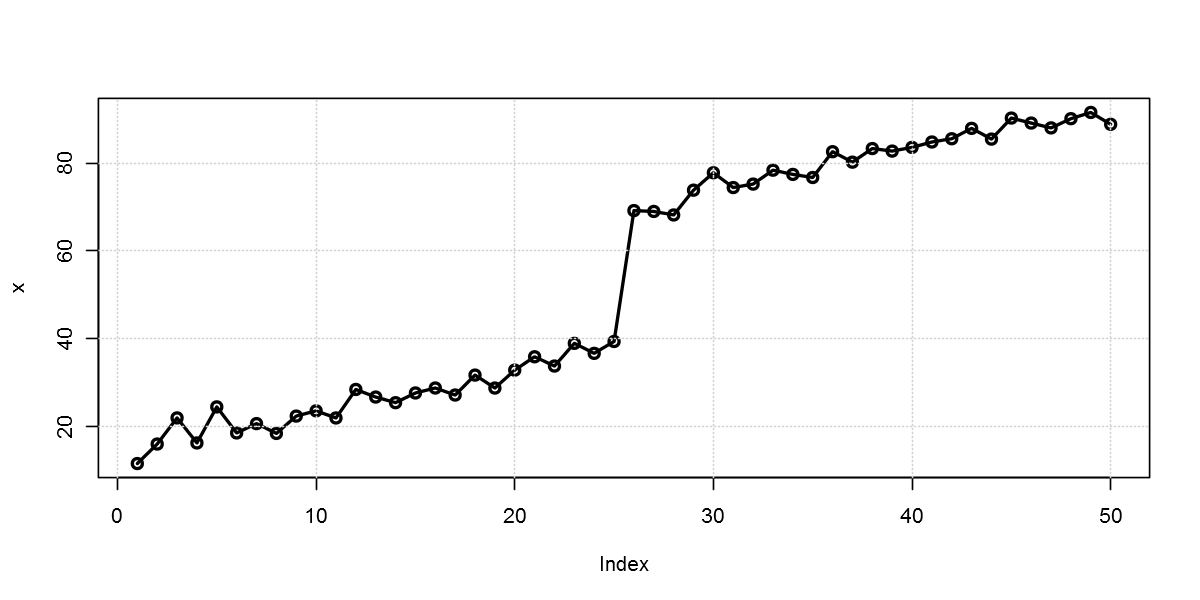

In [19]:
## Serie con cambio estructural

x <- c( 11.60, 16.04, 21.99, 16.29,
        24.50, 18.57, 20.69, 18.46,
        22.41, 23.60, 21.98, 28.47,
        26.74, 25.46, 27.67, 28.80,
        27.20, 31.74, 28.79, 32.87,
        35.91, 33.80, 38.97, 36.69,
        39.39, 69.19, 69.00, 68.20,
        73.84, 77.81, 74.44, 75.23,
        78.39, 77.43, 76.73, 82.60,
        80.22, 83.32, 82.74, 83.58,
        84.81, 85.55, 87.92, 85.47,
        90.26, 89.12, 88.02, 90.12,
        91.54, 88.84  )

options(repr.plot.width=10, repr.plot.height=5)

## Grafica de serie
plot(x,               # datos de la serie
     type = "o",      # o -- overplot
     lwd = 2)         # ancho de la linea

grid()

### Modelo de ajuste cambio estructural

[Contenido](#Contenido)

In [20]:
## Ajuste de modelo de regresión 
## serie con cambio de nivel

x<-ts(x,frequency = 4)

t  <- 1:length(x)          # Longitud de la serie  
t0 <- 26                   # Punto de cambio de la serie
d  <-rep(0,length(x))      # Genereación de variables Dummy's en cero
d[t0:length(x)] <- 1       # 1 en adelante cuando cuando de nivel



m<-lm(x~t+d)               # Modelo de regresión con variable dummy para cambio  

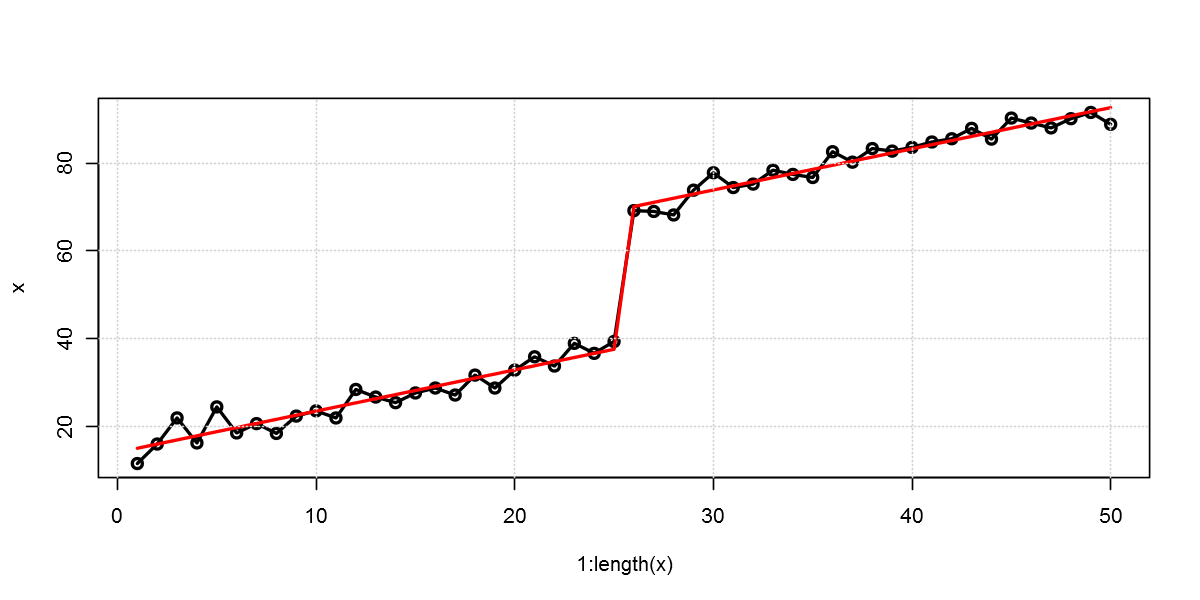

In [21]:
## Grafica de serie
options(repr.plot.width=10, repr.plot.height=5)

plot(1:length(x),
     x,              # Datos
     type="o",       # o -- overplot     
     lwd=2)          # ancho de la linea

lines(1:length(x),m$fitted.values,lwd=2,col="red")

grid()

## Serie de tiempo con cambio de pendiente

[Contenido](#Contenido)

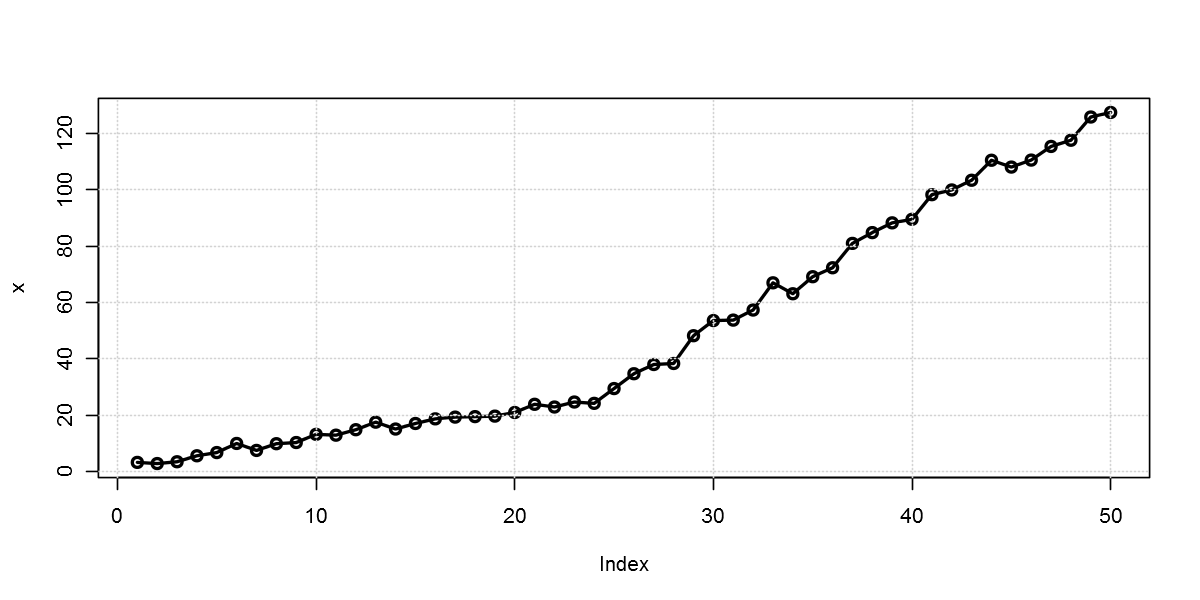

In [22]:
## Serie con cambio de pendiente

x <-  c(    3.20,   2.79,   3.43,   5.55,
            6.69,   9.92,   7.45,   9.84,
            10.25,  13.15,  12.86,  14.80,
            17.48,  15.04,  17.01,  18.65,
            19.27,  19.45,  19.62,  20.91,
            23.82,  22.86,  24.63,  24.16,
            29.40,  34.67,  37.95,  38.31,
            48.16,  53.54,  53.70,  57.28,
            66.94,  63.06,  69.10,  72.28,
            80.93,  84.76,  88.22,  89.48,
            98.22,  99.90, 103.34, 110.44,
            108.02, 110.50, 115.34, 117.55,
            125.79, 127.41)

options(repr.plot.width=10, repr.plot.height=5)

plot(x,               # datos de la serie
     type = "o",      # o -- overplot
     lwd = 2)         # ancho de la linea

grid()

### Modelo de ajuste cambio de pendiente

[Contenido](#Contenido)

In [23]:
## Ajuste del modelo de regresión 
## serie con cambio de pendiente

x<-ts(x,frequency = 4)

t  <- 1:length(x)
t0 <- 26                                    # Punto de cambio de la serie
d  <- rep(0, length(x))                     # Genereación de variables Dummy's en cero
d[t0:length(x)] <- 1:(length(x) - t0 + 1)   # Secuencia para modelar cambio

m <- lm(x~ t+d)                             # Modelo de regresión con variable dummy para cambio 

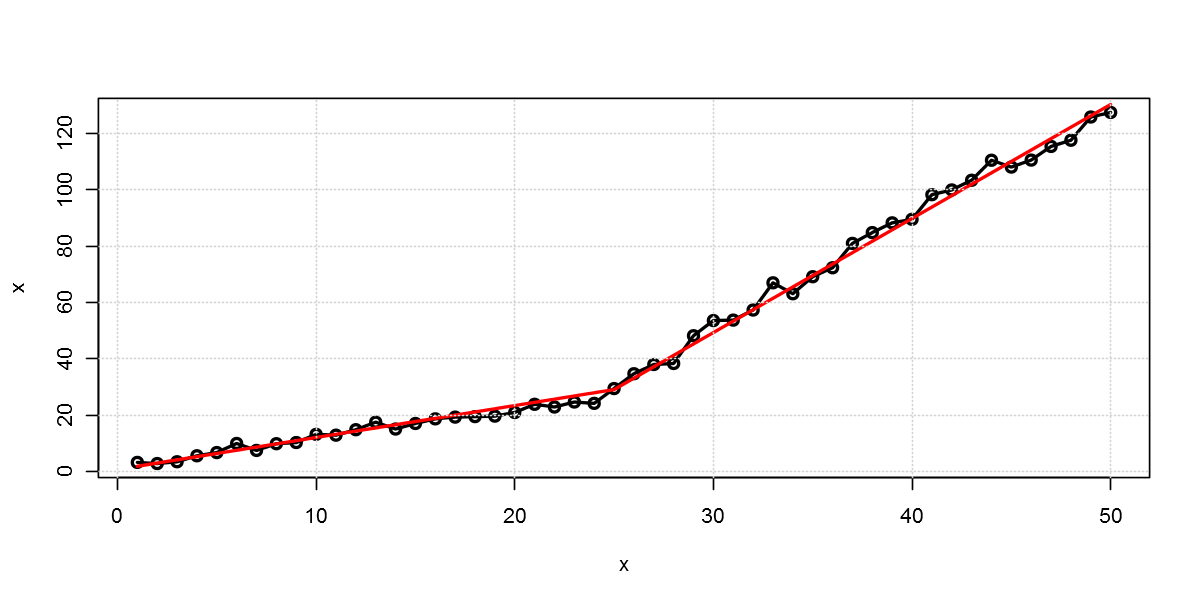

In [24]:
## Grafica de serie
plot(1:length(x),                   # Numero de observaciones
     x,                             # Datos
     type="o",                      # o -- overplot     
     lwd=2,                         # ancho de la linea
     xlab= "x")
 

lines(1:length(x),m$fitted.values,lwd=2,col="red")

grid()

## Serie de tiempo con datos atipicos-outliers

[Contenido](#Contenido)

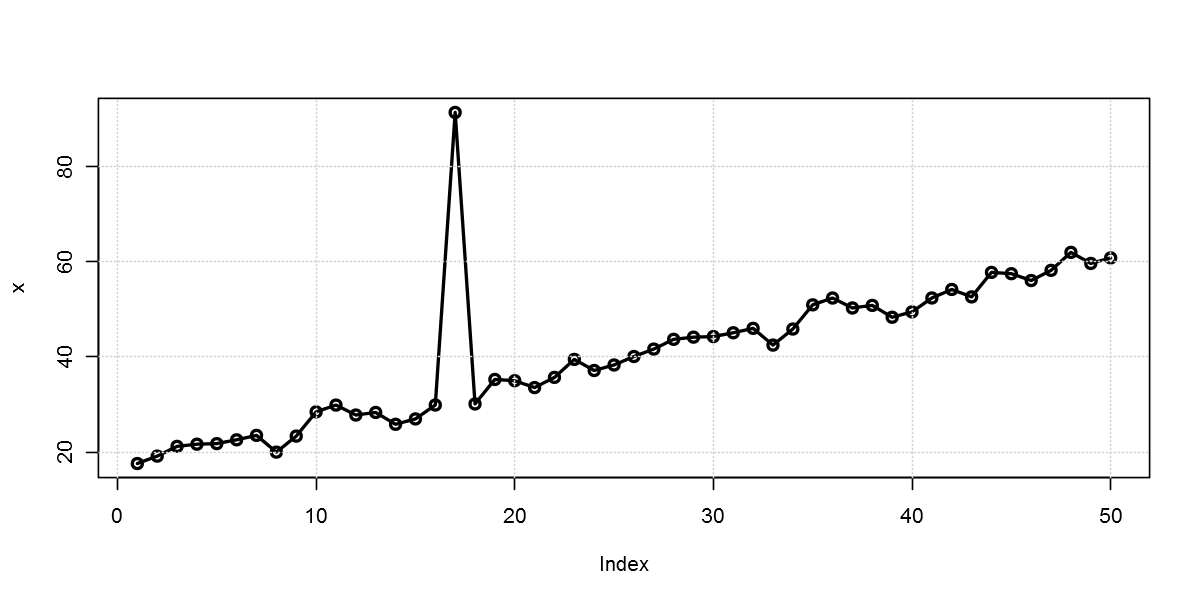

In [25]:
## Serie con outliers 

x <- c( 17.60, 19.16, 21.21, 21.67,
        21.79, 22.59, 23.52, 20.00,
        23.37, 28.46, 29.89, 27.80,
        28.34, 25.85, 26.98, 29.90,
        91.40, 30.13, 35.28, 35.01,
        33.57, 35.71, 39.49, 37.16,
        38.32, 40.10, 41.66, 43.71,
        44.17, 44.29, 45.09, 46.02,
        42.50, 45.87, 50.96, 52.39,
        50.30, 50.84, 48.35, 49.48,
        52.40, 54.19, 52.63, 57.78,
        57.51, 56.07, 58.21, 61.99,
        59.66, 60.82 )

options(repr.plot.width=10, repr.plot.height=5)

plot(x,               # datos de la serie
     type = "o",      # o -- overplot
     lwd = 2)         # ancho de la linea

grid()

### Modelo de ajuste outliers

[Contenido](#Contenido)

In [26]:
## Ajuste del modelo de regresión serie con OUTLIERS

x<-ts(x,frequency = 4)

t <- 1:length(x) 
t0=17                 # Punto de cambio de la serie
d<-rep(0,length(x))   # Genereación de variables Dummy's en cero
d[t0]=1               # 1 en adelante cuando cuando de nivel

m<-lm(x~t+d)         # Modelo de regresión con variable dummy para cambio  

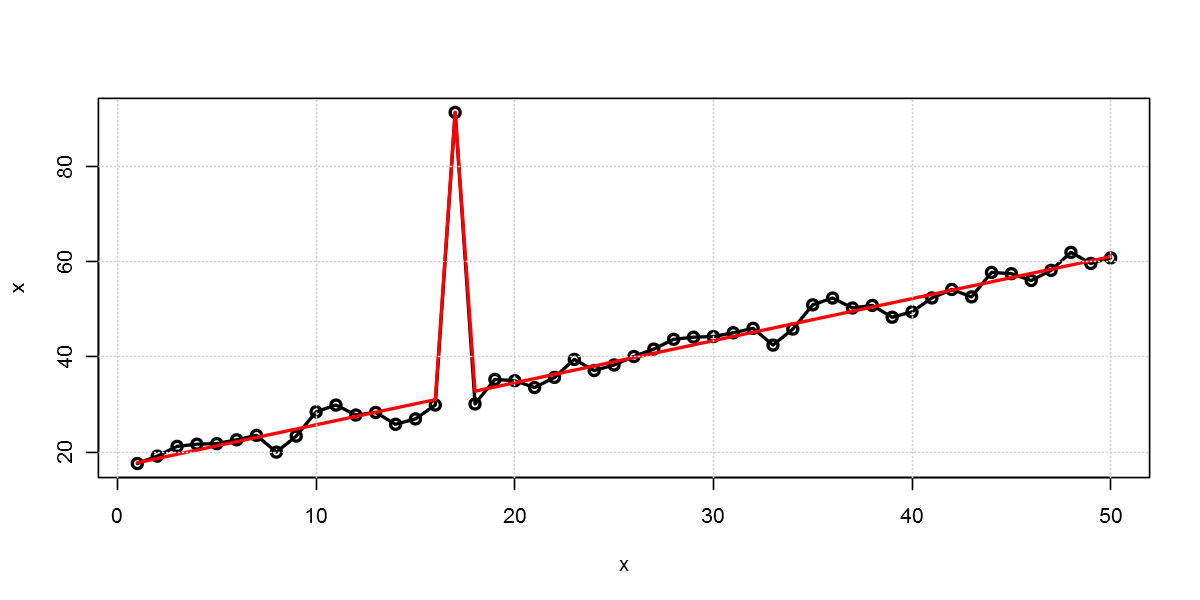

In [27]:
## Grafica de serie
options(repr.plot.width=10, repr.plot.height=5)

plot(1:length(x),
     x,              # Datos
     type="o",        # o -- overplot     
     lwd=2,          # ancho de la linea
     xlab="x")

lines(1:length(x),m$fitted.values,lwd=2,col="red")

grid()

---

**Ejercicio.--**Determine que tipo de intervención presenta la siguiente serie de tiempo y ajuste un modelo de regresión.

---

[Contenido](#Contenido)